# Golf Handicap Tracker

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
pd.set_option("display.max_rows", None)

import warnings

warnings.filterwarnings("ignore")

In [250]:
df = pd.DataFrame(columns=["name", "date", "adj_gross_score", "course_rating", "handicap_diff", "slope_rating", \
                           "putts", "3_putts", "fairways_hit", "gir", "penalty/ob"])

In [251]:
df.head()

,name,date,adj_gross_score,course_rating,handicap_diff,slope_rating,putts,3_putts,fairways_hit,gir,penalty/ob


In [252]:
def add_round(name:str, date:str, adj_gross_score:int, course_rating:np.number, slope_rating:np.number, \
              putts:int, three_putts:int, fairways:int, gir:int, penalties:int, df:pd.DataFrame=df) -> pd.Series:
    
    """ Given specified input data, a new row will be added to the dataframe

    Args:
    ------------------
    name:str | name of player who's score is being recorded
    date:str | day of the round being recorded
    adj_gross_score:int | total score for the round
    course_rating:np.number | course rating found on the scorecard
    slope_rating:np.number | slope rating found on the scorecard
    putts:int | optional if recorded, the total number of putts
    three_putts:int | optional if recorded, the total number of 3-putts
    fairways:int | options if recorded, the total number of fairways hit on par 4's and par 5's
    gir:int | optional greens in regulation, the total number of gir on all 18 holes
    penalties:int | optional total number of instances of out-of-bounds shots or water penalties
    df:pd.DataFrame | original container of data


    """
    row = {
        "name":name,
        "date":pd.to_datetime(date).normalize(),
        "adj_gross_score":adj_gross_score,
        "course_rating":course_rating,
        "slope_rating":slope_rating,
        "putts": putts,
        "3_putts": three_putts, 
        "fairways_hit": fairways,
        "gir": gir, 
        "penalty/ob": penalties
    }

    row["handicap_diff"] = ((row["adj_gross_score"] - row["course_rating"]) * 113) / row["slope_rating"]
    
    df.loc[len(df)] = row
    
    return df

In [253]:
# Testing Function

add_round(name="Dave", date="2024-07-22", adj_gross_score=80, course_rating=72, slope_rating=113, putts=36, \
          three_putts=0, fairways=6, gir=12, penalties=1)
df.shape

(1, 11)

In [254]:
df

,name,date,adj_gross_score,course_rating,handicap_diff,slope_rating,putts,3_putts,fairways_hit,gir,penalty/ob
0,Dave,2024-07-22,80,72,8.0,113,36,0,6,12,1


In [255]:
# Loop to create fake data

today = pd.Timestamp.today()

for i in range(1000):
    # Populate the fields for the add_round() call
    name = np.random.choice(["Pete", "Dave", "Eric"])
    date = today + pd.Timedelta(days=i)
    adj_gross_score = float(np.random.choice([*range(76, 95)]))
    course_rating = float(np.random.choice([71, 71.5, 72, 72.5, 73, 73.5]))
    slope_rating = float(np.random.randint(low=110, high=130, size=1))
    putts = float(np.random.randint(low=18, high=48, size=1))
    three_putts = float(np.random.randint(low=0, high = 9, size = 1))
    fairways = float(np.random.randint(low=0, high = 14, size = 1))
    gir = float(np.random.randint(low=0, high = 18, size = 1))
    penalties = float(np.random.randint(low=0, high = 9, size = 1))

    # Call function and add to the df
    add_round(name, date, adj_gross_score, course_rating, slope_rating, putts, three_putts, fairways, gir, penalties)

In [256]:
df.shape

(1001, 11)

In [257]:
len(df)

1001

In [262]:
df.head()

,name,date,adj_gross_score,course_rating,handicap_diff,slope_rating,putts,3_putts,fairways_hit,gir,penalty/ob,fiveRd_handicap,tenRd_handicap,twentyRd_handicap
0,Dave,2024-07-22,80.0,72.0,8.000000,113.0,36.0,0.0,6.0,12.0,1.0,NaN,NaN,NaN
1,Eric,2024-07-22,79.0,73.0,5.697479,119.0,31.0,0.0,2.0,8.0,6.0,NaN,NaN,NaN
2,Pete,2024-07-23,81.0,72.0,8.475000,120.0,39.0,2.0,13.0,2.0,6.0,NaN,NaN,NaN
3,Eric,2024-07-24,86.0,72.0,13.406780,118.0,19.0,8.0,11.0,0.0,7.0,NaN,NaN,NaN
4,Dave,2024-07-25,84.0,73.5,9.492000,125.0,22.0,6.0,4.0,14.0,3.0,NaN,NaN,NaN


In [263]:
df.columns

Index(['name', 'date', 'adj_gross_score', 'course_rating', 'handicap_diff',
       'slope_rating', 'putts', '3_putts', 'fairways_hit', 'gir', 'penalty/ob',
       'fiveRd_handicap', 'tenRd_handicap', 'twentyRd_handicap'],
      dtype='object')

In [379]:
def plot_statistics(data, column):

    """ Creates a line plot of data tracking the values of a given column over time

    Args:
    ------------------
    data:pd.DataFrame | source of data for the values in the plot
    column:str | name of the column from data to plot

    Returns:
    ------------------
    fig: px.Figure | plotly figure of a lineplot
    """

    label_dict = {
        "adj_gross_score":"Adjusted Gross Score", 
        "handicap_diff": "Handicap Differential",
        "putts": "Putts per Round",
        "3_putts": "3-Putts per Round",
        "fairways_hit": "Fairways Hit per Round",
        "gir": "Greens in Regulation",
        "penalty/ob": "Penalties / OB per Round",
        "fiveRd_handicap": "Five-Round Rolling Handicap",
        "tenRd_handicap": "Ten-Round Rolling Handicap",
        "twentyRd_handicap": "Twenty-Round Rolling Handicap"
    }
        
    if len(data.dropna(subset=column)["date"].unique()) < 50:
        length = len(data.dropna(subset=column)["date"].unique()) 
    else:
        length = 50

    date_cutoff = pd.Series(data.dropna(subset=column)["date"].unique()).sort_values().to_list()[-length]
    
    period = f"- Last {length} Days"
    
    
    fig = px.line(data_frame=data.dropna(subset=column).loc[data["date"] >= date_cutoff],\
                  x="date", y=column, color="name", markers=True, hover_name="name",\
                 title=f"{label_dict[column]} per Round of Golf {period}", labels={"date":"Date", column:label_dict[column]},
                 hover_data={"name":False})
    
    fig.update_layout(legend={"title":"Player"})

    return fig

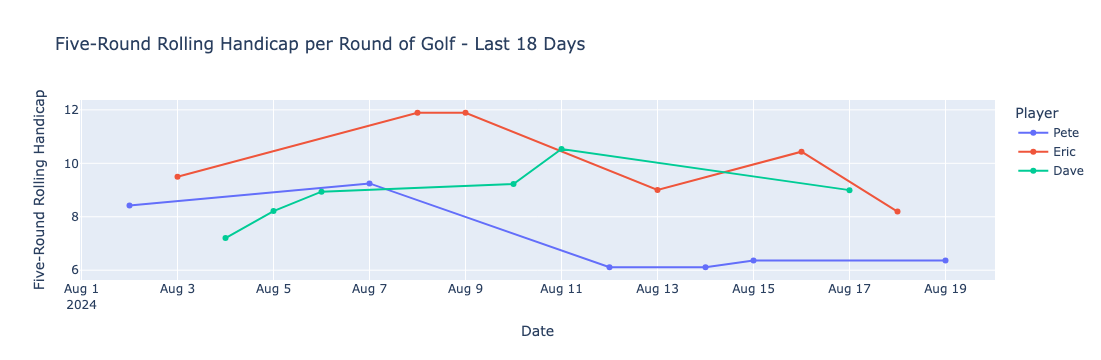

In [381]:
plot_statistics(df.head(30), "fiveRd_handicap")

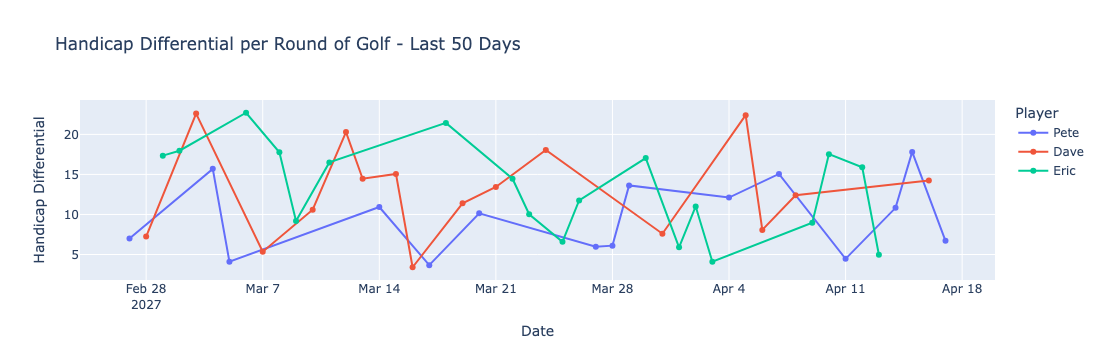

In [342]:
plot_statistics(df, "handicap_diff")

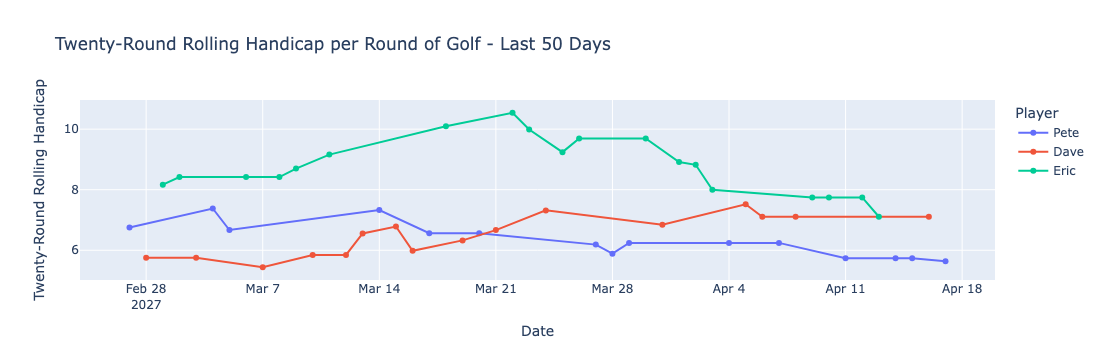

In [322]:
plot_statistics(df, "twentyRd_handicap")

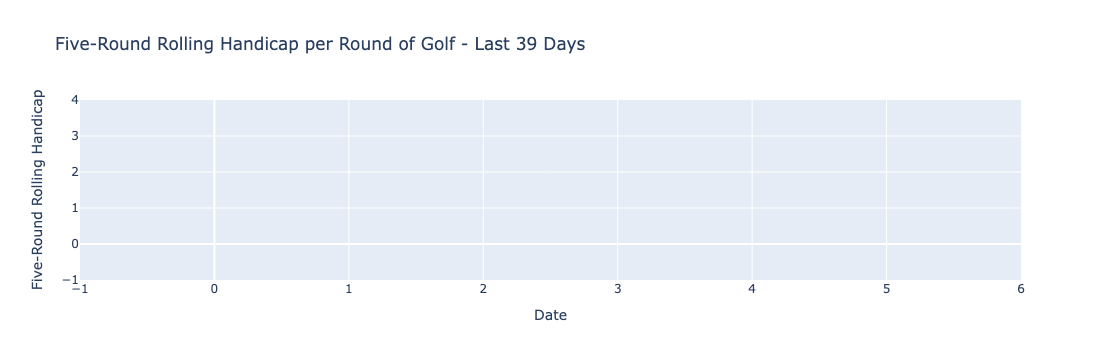

In [299]:
plot_statistics(df.head(40), "fiveRd_handicap")

In [300]:
df.head(40)["date"].agg(["min", "max"])

min   2024-07-22
max   2024-08-29
Name: date, dtype: datetime64[ns]

In [301]:
df.head(40)

,name,date,adj_gross_score,course_rating,handicap_diff,slope_rating,putts,3_putts,fairways_hit,gir,penalty/ob,fiveRd_handicap,tenRd_handicap,twentyRd_handicap
0,Dave,2024-07-22,80.0,72.0,8.000000,113.0,36.0,0.0,6.0,12.0,1.0,NaN,NaN,NaN
1,Eric,2024-07-22,79.0,73.0,5.697479,119.0,31.0,0.0,2.0,8.0,6.0,NaN,NaN,NaN
2,Pete,2024-07-23,81.0,72.0,8.475000,120.0,39.0,2.0,13.0,2.0,6.0,NaN,NaN,NaN
3,Eric,2024-07-24,86.0,72.0,13.406780,118.0,19.0,8.0,11.0,0.0,7.0,NaN,NaN,NaN
4,Dave,2024-07-25,84.0,73.5,9.492000,125.0,22.0,6.0,4.0,14.0,3.0,NaN,NaN,NaN
5,Dave,2024-07-26,77.0,73.0,4.109091,110.0,46.0,4.0,5.0,11.0,0.0,NaN,NaN,NaN
6,Eric,2024-07-27,86.0,71.5,12.701550,129.0,25.0,5.0,5.0,2.0,8.0,NaN,NaN,NaN
7,Dave,2024-07-28,84.0,71.5,11.035156,128.0,21.0,0.0,11.0,4.0,5.0,NaN,NaN,NaN
8,Pete,2024-07-29,89.0,72.5,16.355263,114.0,39.0,0.0,4.0,1.0,6.0,NaN,NaN,NaN
9,Eric,2024-07-30,82.0,72.0,10.089286,112.0,40.0,7.0,10.0,5.0,3.0,NaN,NaN,NaN


In [260]:
def get_handicap(data, window=5):

    """
    Return a pd.Series of handicap values based on the window of rounds desired

    Args:
    --------------
    data: pd.DataFrame | dataframe containing all round data filtered by player name
    window: int | number of rounds for which your handicap should be based on

    Returns:
    ---------------
    rolling_means: pd.Series | a Series of values containing the calculated handicap scores
    """

    if window == 5:
        scores = 3
    elif window == 10:
        scores = 5
    else:
        scores = 8
    
    data = data.sort_values(by="date", ascending=True)
    if len(df) < window:
        return pd.Series([None] * len(series), index=data.index)
    rolling_means = data["handicap_diff"].rolling(window).apply(lambda x: x.nsmallest(scores).mean(), raw=False)
    return rolling_means

In [261]:
for name in df["name"].unique():
    values = get_handicap(df.loc[df["name"] == name], window=5)
    df.loc[df["name"] == name, "fiveRd_handicap"] = values

    df.loc[df["name"] == name, "tenRd_handicap"] = get_handicap(df.loc[df["name"] == name], window=10)

    df.loc[df["name"] == name, "twentyRd_handicap"] = get_handicap(df.loc[df["name"] == name], window=20)

df.sort_values(by= ["name", "date"])[["name", "fiveRd_handicap", "tenRd_handicap", "twentyRd_handicap"]]

,name,fiveRd_handicap,tenRd_handicap,twentyRd_handicap
0,Dave,NaN,NaN,NaN
4,Dave,NaN,NaN,NaN
5,Dave,NaN,NaN,NaN
7,Dave,NaN,NaN,NaN
14,Dave,7.200364,NaN,NaN
15,Dave,8.212082,NaN,NaN
16,Dave,8.939267,NaN,NaN
20,Dave,9.221617,NaN,NaN
21,Dave,10.533260,NaN,NaN
27,Dave,8.996242,6.723946,NaN


In [247]:
df.query("name == 'Eric'")[["handicap_diff"]][:10].sort_values("handicap_diff")[:5].sum() / 5

handicap_diff    7.644128
dtype: float64

In [248]:
df

,name,date,adj_gross_score,course_rating,handicap_diff,slope_rating,putts,3_putts,fairways_hit,gir,penalty/ob,fiveRd_handicap,tenRd_handicap,twentyRd_handicap
0,Dave,2024-07-22 00:00:00.000000,80.0,72.0,8.000000,113.0,36.0,0.0,6.0,12.0,1.0,NaN,NaN,NaN
1,Eric,2024-07-22 22:35:36.710477,77.0,72.0,4.556452,124.0,26.0,4.0,13.0,15.0,8.0,NaN,NaN,NaN
2,Dave,2024-07-23 22:35:36.710477,90.0,71.0,18.508621,116.0,26.0,5.0,3.0,2.0,7.0,NaN,NaN,NaN
3,Dave,2024-07-24 22:35:36.710477,80.0,73.0,7.000000,113.0,21.0,3.0,1.0,13.0,1.0,NaN,NaN,NaN
4,Eric,2024-07-25 22:35:36.710477,91.0,72.0,16.773438,128.0,32.0,3.0,5.0,9.0,0.0,NaN,NaN,NaN
5,Eric,2024-07-26 22:35:36.710477,94.0,71.5,20.504032,124.0,38.0,6.0,6.0,12.0,7.0,NaN,NaN,NaN
6,Dave,2024-07-27 22:35:36.710477,89.0,73.0,15.586207,116.0,47.0,0.0,8.0,17.0,7.0,NaN,NaN,NaN
7,Pete,2024-07-28 22:35:36.710477,82.0,72.5,9.097458,118.0,24.0,3.0,5.0,6.0,2.0,NaN,NaN,NaN
8,Dave,2024-07-29 22:35:36.710477,89.0,73.5,13.577519,129.0,24.0,4.0,8.0,2.0,7.0,9.525840,NaN,NaN
9,Pete,2024-07-30 22:35:36.710477,76.0,72.0,3.616000,125.0,34.0,7.0,7.0,0.0,0.0,NaN,NaN,NaN
